## Regresión desde la econometría

### Desafio 1:

- Importe las librerías básicas para el análisis de datos.
- Incluya los import base de statsmodels .
- Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

plt.style.use("ggplot")

In [2]:
df = pd.read_csv("Credit.csv").drop(columns=["Unnamed: 0"])

- Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable.
- Para el caso de Ethnicity, genere binarias para African_American y Asian .
    - tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas

In [3]:
# df["Gender"] = df["Gender"].str.strip()
# df["gender_male"] = np.where(df["Gender"] == "Male", 1 , 0)
# df[df["gender_male"] == 1]

In [4]:
var_cat = ['Gender','Student','Married', 'Ethnicity']

In [5]:
#idx me pone el indice del valor que se repite menos veces
for cat in var_cat:
    print(cat)
    val_min = df[cat].value_counts().idxmin()
    df[f"{cat.lower()}_{val_min.lower().replace(' ', '_')}"] =np.where(df[cat] == val_min ,1 , 0)
display(df)

Gender
Student
Married
Ethnicity


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,gender__male,student_yes,married_no,ethnicity_african_american
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,1,0,0,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,1,0,1,1
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0,0,0,0
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,1,0,0,0


In [6]:
df["ethnicity_asian"] = np.where(df["Ethnicity"] == "Asian", 1 , 0)

### Desafio 2:
- Genere una función llamada plot_hist que genere un histograma de la variable e indique la
media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [7]:
def plot_hist(df, var):
    plt.figure(figsize=(10,7))
    df[var].hist(alpha = .5)
    plt.axvline(df[var].mean(), label= "Media", color="tomato")
    plt.axvline(df[var].median(), label= "Mediana", color="indigo")
    plt.title(f"Histograma de: {var}")
    plt.legend()

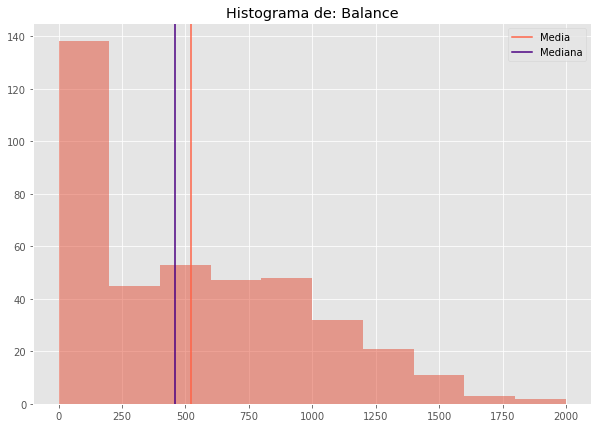

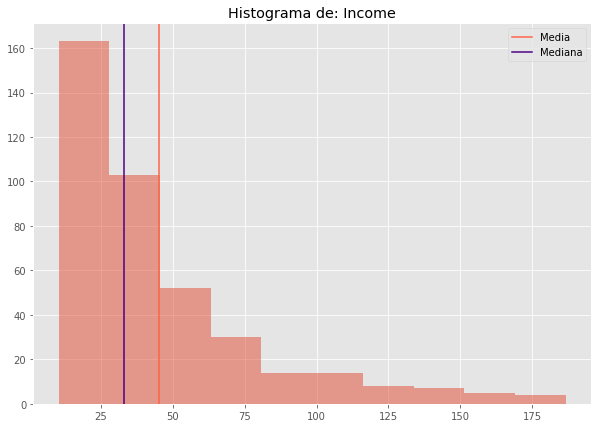

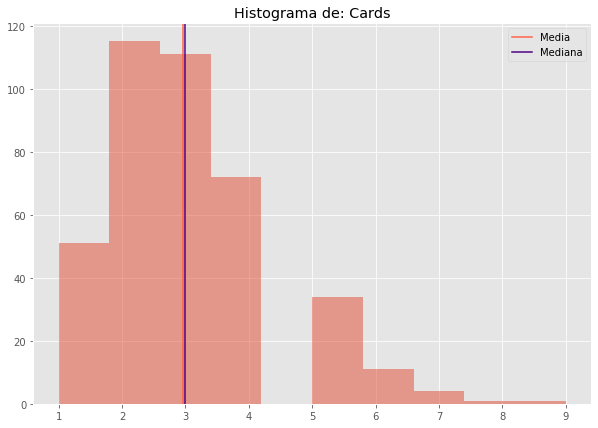

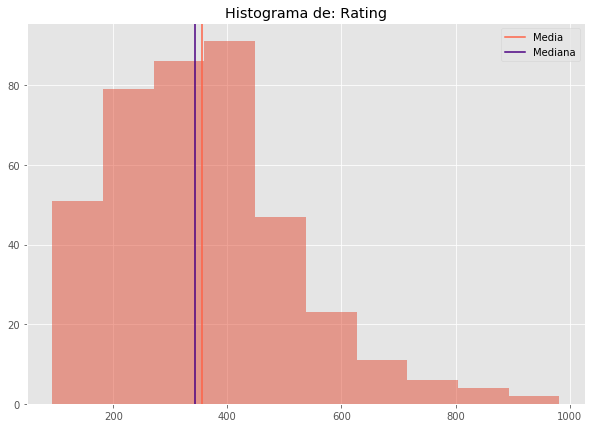

In [8]:
for i in ["Balance","Income", "Cards","Rating"]:
    plot_hist(df, i)
    plt.show()

In [9]:
print("Las variables parecen tener una distribucion sesgada hacia la izquierda")

Las variables parecen tener una distribucion sesgada hacia la izquierda


### Desafío 3:
- A continuación generaremos una serie de modelos simples:
$$ Balance = \beta_0 + \beta_1 * Student + \epsilon $$
$$ Balance = \beta_0 + \beta_1 * Income + \epsilon $$
$$ Balance = \beta_0 + \beta_1 * Rating + \epsilon $$

In [10]:
model = smf.ols("Balance ~ Student", df)
model= model.fit()
results = model.summary()
results.tables[0]

Dep. Variable:,Balance,R-squared:,0.067
Model:,OLS,Adj. R-squared:,0.065
Method:,Least Squares,F-statistic:,28.62
Date:,"Sun, 29 Nov 2020",Prob (F-statistic):,1.49e-07
Time:,20:36:07,Log-Likelihood:,-3005.5
No. Observations:,400,AIC:,6015.
Df Residuals:,398,BIC:,6023.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [11]:
model_1 = smf.ols("Balance ~ Income", df).fit()
results_1 =model_1.summary()
results_1.tables[0]

Dep. Variable:,Balance,R-squared:,0.215
Model:,OLS,Adj. R-squared:,0.213
Method:,Least Squares,F-statistic:,109.0
Date:,"Sun, 29 Nov 2020",Prob (F-statistic):,1.03e-22
Time:,20:36:07,Log-Likelihood:,-2970.9
No. Observations:,400,AIC:,5946.
Df Residuals:,398,BIC:,5954.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [12]:
model_2 = smf.ols("Balance ~ Rating", df).fit()
results_2 =model_2.summary()
results_2.tables[0]

Dep. Variable:,Balance,R-squared:,0.746
Model:,OLS,Adj. R-squared:,0.745
Method:,Least Squares,F-statistic:,1168.
Date:,"Sun, 29 Nov 2020",Prob (F-statistic):,1.90e-120
Time:,20:36:08,Log-Likelihood:,-2745.4
No. Observations:,400,AIC:,5495.
Df Residuals:,398,BIC:,5503.
Df Model:,1,,
Covariance Type:,nonrobust,,


- Utilizando statsmodels, comente brevemente los siguientes puntos:
    - ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?

In [13]:
print("La variable que presenta un mayor poder explicativo de la variable Balance es Rating. Esto se debe a que este modelo posee un mayor R cuadrado adj y un menor valor en los criterios de AIC y BIC.")

La variable que presenta un mayor poder explicativo de la variable Balance es Rating. Esto se debe a que este modelo posee un mayor R cuadrado adj y un menor valor en los criterios de AIC y BIC.


   - ¿Qué podemos decir sobre el comportamiento de Student ?

In [14]:
print("Podemos decir que el modelo con la variable explicativa Student es el menos representativo de los tres presentados.")

Podemos decir que el modelo con la variable explicativa Student es el menos representativo de los tres presentados.


- ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [15]:
stats.ttest_ind(df[df["student_yes"] == 1]["Balance"], df[df["student_yes"] == 0]["Balance"])

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

### Desafio 4:
- Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

In [16]:
formula = "Balance ~"
for i in df.loc[:,"Income":"Ethnicity"].columns:
    print(i)
    formula += f" {i} +"
formula = formula.strip(" +")

Income
Limit
Rating
Cards
Age
Education
Gender
Student
Married
Ethnicity


In [17]:
formula

'Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity'

In [18]:
model_3 = smf.ols(formula, df)
model_3 = model_3.fit()
results_3 = model_3.summary()
results_3.tables[0]

Dep. Variable:,Balance,R-squared:,0.955
Model:,OLS,Adj. R-squared:,0.954
Method:,Least Squares,F-statistic:,750.3
Date:,"Sun, 29 Nov 2020",Prob (F-statistic):,1.11e-253
Time:,20:36:09,Log-Likelihood:,-2398.7
No. Observations:,400,AIC:,4821.
Df Residuals:,388,BIC:,4869.
Df Model:,11,,
Covariance Type:,nonrobust,,


Modelo explicativo alto. Explica el 95,5.
Mejoro el R cuadrado ajustado y los criterios de AIC y BIC

Las variables que no son significativas las debo excluir ya que no suman a la explicatividad de la variable dependiente.

### Desafio 5:
- En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia $p - value \leq 0.025$. Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.
- ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [19]:
tablita = model_3.summary2().tables[1]
tablita

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-479.207871,35.773937,-13.395447,6.730600e-34,-549.542897,-408.872844
Gender[T.Female],-10.653248,9.914000,-1.074566,2.832368e-01,-30.145132,8.838637
Student[T.Yes],425.747360,16.722580,25.459430,8.854521e-85,392.869147,458.625572
Married[T.Yes],-8.533901,10.362875,-0.823507,4.107256e-01,-28.908316,11.840515
Ethnicity[T.Asian],16.804179,14.119063,1.190177,2.347047e-01,-10.955267,44.563625
Ethnicity[T.Caucasian],10.107025,12.209923,0.827771,4.083088e-01,-13.898867,34.112917
Income,-7.803102,0.234232,-33.313573,7.372312e-116,-8.263624,-7.342579
Limit,0.190907,0.032779,5.824124,1.205974e-08,0.126461,0.255353
Rating,1.136527,0.490894,2.315216,2.112213e-02,0.171380,2.101673
Cards,17.724484,4.341033,4.083011,5.401200e-05,9.189592,26.259375


In [20]:
filtrar = list(tablita[tablita['P>|t|'] > .025].index)
filtrar

['Gender[T.Female]',
 'Married[T.Yes]',
 'Ethnicity[T.Asian]',
 'Ethnicity[T.Caucasian]',
 'Age',
 'Education']

In [21]:
model_4 = smf.ols('Balance ~ Income + Limit + Cards + Student + Rating', df)
model_4 = model_4.fit()
results_4 = model_4.summary()
model_4.summary().tables[0]

Dep. Variable:,Balance,R-squared:,0.954
Model:,OLS,Adj. R-squared:,0.954
Method:,Least Squares,F-statistic:,1640.
Date:,"Sun, 29 Nov 2020",Prob (F-statistic):,3.60e-261
Time:,20:36:10,Log-Likelihood:,-2402.8
No. Observations:,400,AIC:,4818.
Df Residuals:,394,BIC:,4842.
Df Model:,5,,
Covariance Type:,nonrobust,,


In [22]:
print("Considerando los criterios de AIC y BIC el modelo mejoro con respecto a los iniciales.")

Considerando los criterios de AIC y BIC el modelo mejoro con respecto a los iniciales.


### Desafio 6:
Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales
determinantes.

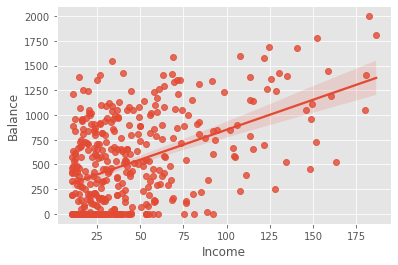

In [23]:
sns.regplot("Income", "Balance", data =df)

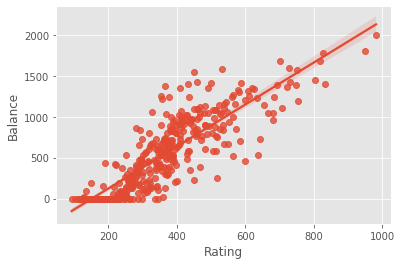

In [24]:
sns.regplot("Rating", "Balance", data =df)

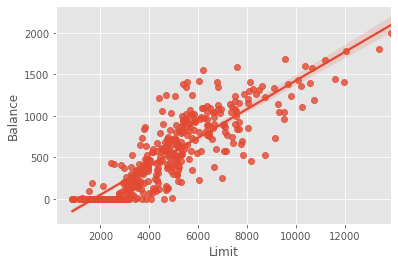

In [25]:
sns.regplot("Limit", "Balance", data =df)

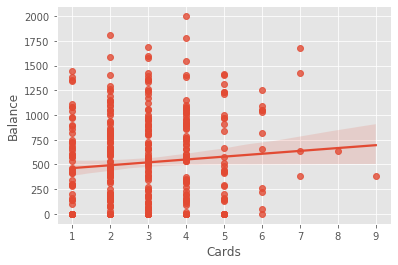

In [26]:
sns.regplot("Cards", "Balance", data =df)